In [1]:
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
seed = 7
cross_fold = 5
scoring = 'roc_auc' # scoring parameter
# warnings.filterwarnings('ignore')

In [2]:
def trainAndTestModel(model_name,model,X_train,Y_train, x_test,y_test):
    model.fit(X_train, Y_train)
    # mse = mean_squared_error(Y_test,model.predict(X_test))
    # print(f"{model_name}: Mean Squared Error (MSE) = {mse}")
    try:
        print(f"{model_name}: Score (roc_auc) = {model.score(X_train, Y_train)}, Best Parameters= {model.best_params_}")
    except:
        print(f"{model_name}: Score (roc_auc) = {model.score(X_train, Y_train)}") 

    print(f"{model_name}: Test Score (roc_auc) = {model.score(x_test,y_test)} ")   

    print(classification_report(y_true=y_test,y_pred=model.predict(x_test))) 
    plot_confusion_matrix(model, x_test, y_test) 
    plt.show() 
    return model

In [3]:
cols = ["username_sim",	"name_sim",	"loc_sim",	"bio_sim",	"website_sim",	"birthday_sim"]

dfx = pd.read_csv("dataset.csv",usecols=cols)
dfy = pd.read_csv("dataset.csv",usecols=["Label"])
x_features = dfx.values
y_labels = dfy.values
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.33, random_state=seed, stratify=y_labels)




Feature ranking:
1. feature 0 (0.643266)
2. feature 1 (0.295534)
3. feature 2 (0.030506)
4. feature 3 (0.021160)
5. feature 4 (0.005862)
6. feature 5 (0.003672)


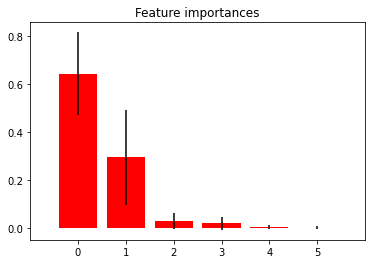

Indices of features  : [0 1 2 3 4 5]


In [4]:
num_trees = 64
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators= 24,random_state=seed)
# forest = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# RandomForestClassifier(n_estimators=num_trees,random_state=seed, max_depth = 3, min_samples_leaf=4)
forest.fit(x_train, np.ravel(y_train))
importances = forest.feature_importances_
# print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()
print("Indices of features  :",indices)

ExtraTreesClassifier: Score (roc_auc) = 0.9996368243243243, Best Parameters= {'criterion': 'entropy', 'n_estimators': 4, 'random_state': 42}
ExtraTreesClassifier: Test Score (roc_auc) = 0.9153969807100922 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       292
           1       0.87      0.82      0.84        49

    accuracy                           0.96       341
   macro avg       0.92      0.90      0.91       341
weighted avg       0.96      0.96      0.96       341



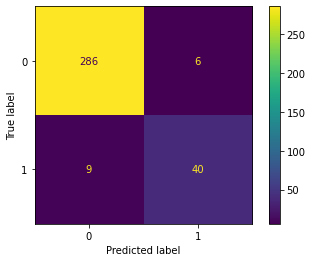

In [5]:
from sklearn import ensemble
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'criterion':["gini", "entropy"], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.ExtraTreesClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "ExtraTreesClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

RandoForestClassifier: Score (roc_auc) = 0.9988766891891891, Best Parameters= {'criterion': 'gini', 'n_estimators': 8, 'random_state': 42}
RandoForestClassifier: Test Score (roc_auc) = 0.9193458205199889 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       292
           1       0.83      0.82      0.82        49

    accuracy                           0.95       341
   macro avg       0.90      0.89      0.90       341
weighted avg       0.95      0.95      0.95       341



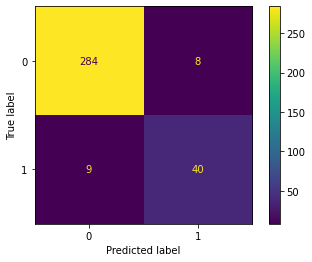

In [6]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'criterion':["gini", "entropy"], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.RandomForestClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "RandoForestClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

GradientBoostingClassifier: Score (roc_auc) = 0.9823564189189189, Best Parameters= {'criterion': 'mse', 'learning_rate': 1, 'n_estimators': 2, 'random_state': 42}
GradientBoostingClassifier: Test Score (roc_auc) = 0.9470925356443947 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       292
           1       0.91      0.82      0.86        49

    accuracy                           0.96       341
   macro avg       0.94      0.90      0.92       341
weighted avg       0.96      0.96      0.96       341



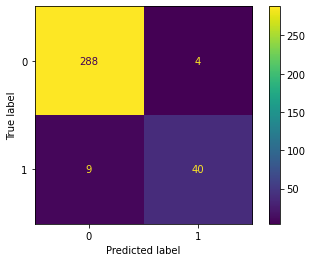

In [21]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400],  'learning_rate':[0.001,0.01,0.1,1,1.5,2] , 'criterion':['friedman_mse', 'mse', 'mae'], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.GradientBoostingClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "GradientBoostingClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

AdaBoostClassifier: Score (roc_auc) = 0.9795608108108108, Best Parameters= {'learning_rate': 0.1, 'n_estimators': 32, 'random_state': 42}
AdaBoostClassifier: Test Score (roc_auc) = 0.9656485882024042 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       292
           1       0.98      0.82      0.89        49

    accuracy                           0.97       341
   macro avg       0.97      0.91      0.94       341
weighted avg       0.97      0.97      0.97       341



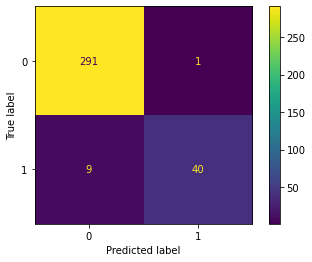

In [22]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'learning_rate':[0.001,0.01,0.1,0.2] ,  'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.AdaBoostClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "AdaBoostClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

RandoForestClassifier: Score (roc_auc) = 0.9989273648648648, Best Parameters= {'n_estimators': 8, 'random_state': 42}
RandoForestClassifier: Test Score (roc_auc) = 0.9204640760413755 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       292
           1       0.87      0.82      0.84        49

    accuracy                           0.96       341
   macro avg       0.92      0.90      0.91       341
weighted avg       0.96      0.96      0.96       341



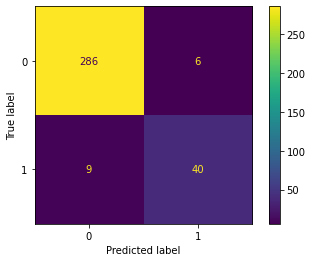

In [20]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.BaggingClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "BaggingClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)